In [1]:
import tensorflow

# Import all the Dependencies

In [2]:
import os
import random
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model


In [8]:
data_dir = "PlantVillage"

In [9]:
# Set the ratio for splitting the data
split_ratio = [0.6, 0.2, 0.2]

# Define the classes in the dataset
classes = ['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']

# Create directories for train, validation, and test sets
for cls in classes:
    os.makedirs(os.path.join('data', 'train', cls))
    os.makedirs(os.path.join('data', 'val', cls))
    os.makedirs(os.path.join('data', 'test', cls))

# Split the data and copy images to appropriate directories
for cls in classes:
    src = os.path.join(data_dir, cls)
    all_files = os.listdir(src)
    np.random.shuffle(all_files)
    split_index1 = int(split_ratio[0] * len(all_files))
    split_index2 = int((split_ratio[0] + split_ratio[1]) * len(all_files))
    train_files = all_files[:split_index1]
    val_files = all_files[split_index1:split_index2]
    test_files = all_files[split_index2:]
    for file_name in train_files:
        shutil.copy(os.path.join(src, file_name), os.path.join('data', 'train', cls))
    for file_name in val_files:
        shutil.copy(os.path.join(src, file_name), os.path.join('data', 'val', cls))
    for file_name in test_files:
        shutil.copy(os.path.join(src, file_name), os.path.join('data', 'test', cls))


# Set all the constants

In [12]:
# Set the batch size and image size
batch_size = 32
img_size = (224, 224)

# Define the train data generator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(os.path.join('data', 'train'),
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Define the validation data generator
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(os.path.join('data', 'val'),
                                                target_size=img_size,
                                                batch_size=batch_size,
                                                class_mode='categorical')

# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(os.path.join('data', 'test'),
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')


Found 1291 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
Found 431 images belonging to 3 classes.


In [13]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [15]:
# Freeze the pre-trained layers
for layer in vgg_model.layers[:-1]:
    layer.trainable = False


In [18]:
from tensorflow.keras.layers import Dropout
# Add new classification layer
x = vgg_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)


In [20]:
# Create new model
model_vgg = Model(inputs=vgg_model.input, outputs=predictions)


In [24]:
train_dir="C:/Users/ladij/OneDrive/Documents/Tarp Project/training/data/train"
val_dir="C:/Users/ladij/OneDrive/Documents/Tarp Project/training/data/val"
test_dir="C:/Users/ladij/OneDrive/Documents/Tarp Project/training/data/test"

In [27]:
# Set up image data generators for train and validation sets
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


# Evaluate the model on the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)


Found 1291 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
Found 431 images belonging to 3 classes.


In [31]:
model_vgg.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [32]:
train_num = train_generator.samples
valid_num = val_generator.samples
print("train_num is:",train_num)
print("valid_num is:",valid_num)

train_num is: 1291
valid_num is: 430


In [ ]:
'''from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
'''


In [36]:
history = model_vgg.fit(train_generator,
        steps_per_epoch=train_num//batch_size,
        validation_data=val_generator,
        epochs=5,
        validation_steps=valid_num//batch_size,
        )

Epoch 1/5
40/40 [==============================] - 224s 6s/step - loss: 1.9795 - accuracy: 0.6180 - val_loss: 0.3706 - val_accuracy: 0.8870
Epoch 2/5
40/40 [==============================] - 261s 7s/step - loss: 0.4528 - accuracy: 0.8284 - val_loss: 0.2270 - val_accuracy: 0.9255
Epoch 3/5
40/40 [==============================] - 284s 7s/step - loss: 0.3548 - accuracy: 0.8737 - val_loss: 0.2540 - val_accuracy: 0.9303
Epoch 4/5
40/40 [==============================] - 289s 7s/step - loss: 0.2923 - accuracy: 0.8880 - val_loss: 0.2431 - val_accuracy: 0.9038
Epoch 5/5
40/40 [==============================] - 279s 7s/step - loss: 0.2941 - accuracy: 0.8832 - val_loss: 0.2310 - val_accuracy: 0.9087


In [38]:
test_loss, test_acc = model_vgg.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)


14/14 [==============================] - 68s 5s/step - loss: 0.2382 - accuracy: 0.9072
Test accuracy: 0.907192587852478


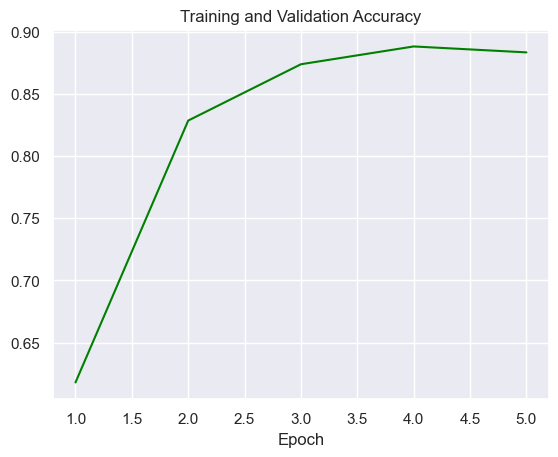

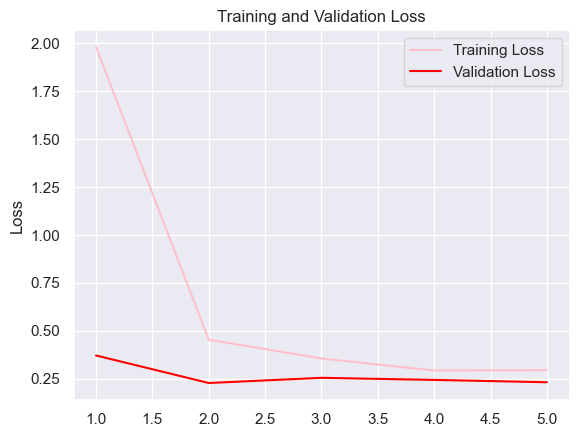

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# #accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')

# plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

# plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# plt.legend()
plt.figure()

# #loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')

# plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
import os
save_path="C:/Users/ladij/OneDrive/Documents/Tarp Project/training/vgg_model"
model_version=max([int(i) for i in os.listdir(save_path) + [0]])+1
model.save(f"save_path/{model_version}")

INFO:tensorflow:Assets written to: save_path/1\assets


INFO:tensorflow:Assets written to: save_path/1\assets


In [52]:
 #Saving our model
 filepath="vgg_model_.h5"
 model_vgg.save(filepath)

In [57]:
from tensorflow import keras
classifier = keras.models.load_model("C:/Users/ladij/OneDrive/Documents/Tarp Project/training/vgg_model_.h5")

In [72]:
# its wrong from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

Following is our prediction:
1/1 [==============================] - 0s 161ms/step


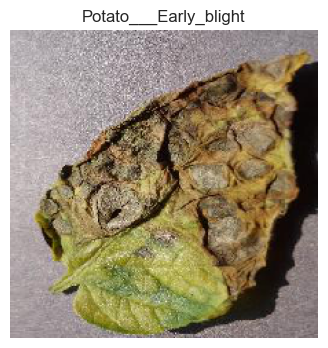

In [76]:
# predicting an image
image_path = "Potato___Early_blight.jpg"


new_img = load_img(image_path, target_size=(224, 224))
img = img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = classes[index]

     
        
##Another way
img_class = classifier.predict(img)
#img_prob = classifier.predict_proba(img)


# convert the predicted outputs to probabilities
img_prob = np.exp(img_class) / np.sum(np.exp(img_class), axis=-1, keepdims=True)


#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

In [79]:
print(img_class)
#probability
print(img_prob.max())

[[9.1614646e-01 8.2996391e-02 8.5715094e-04]]
0.5449358


In [80]:
print(img_class)

[[9.1614646e-01 8.2996391e-02 8.5715094e-04]]
